In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
credit_df=pd.read_csv(r'credit-card-default.csv')

In [3]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit_df.shape

(30000, 25)

In [5]:
credit_df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


## Data preparation

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=credit_df.drop('defaulted',axis=1)

In [9]:
y=credit_df['defaulted']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc=RandomForestClassifier()

In [13]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
y_test_pred=rfc.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score,classification_report

In [16]:
accuracy_score(y_test,y_test_pred)

0.8148888888888889

In [17]:
print(classification_report(y_test,y_test_pred))

precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.81      0.79      9000



In [18]:
from sklearn.model_selection import KFold,GridSearchCV

In [19]:
folds=KFold(n_splits=5,shuffle=True,random_state=42)
rf=RandomForestClassifier()

In [20]:
params={'max_depth':range(2,20,5)}

In [21]:
tree_cv=GridSearchCV(rf,params,scoring='accuracy',return_train_score=True,cv=folds,verbose=True)

In [22]:
tree_cv.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   43.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_scor

In [23]:
tree_cv.best_params_

{'max_depth': 12}

In [24]:
tree_cv_results=tree_cv.cv_results_

In [25]:
tree_cv_results=pd.DataFrame(tree_cv_results)

In [26]:
tree_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.635904,0.021606,0.022343,0.000489,2,{'max_depth': 2},0.808095,0.796905,0.800714,0.803333,...,0.801429,0.004004,4,0.803095,0.804286,0.802024,0.800179,0.800000,0.801917,0.001656
1,1.604954,0.039514,0.037295,0.002782,7,{'max_depth': 7},0.825000,0.810952,0.812857,0.823333,...,0.818714,0.005706,2,0.835833,0.838512,0.835774,0.834583,0.836310,0.836202,0.001287
2,2.658706,0.062599,0.055252,0.001850,12,{'max_depth': 12},0.822143,0.809762,0.815952,0.824048,...,0.818952,0.005382,1,0.886488,0.888810,0.888690,0.887143,0.886429,0.887512,0.001042
3,3.067437,0.067489,0.064837,0.002598,17,{'max_depth': 17},0.818333,0.809048,0.817619,0.822143,...,0.817571,0.004561,3,0.929762,0.927738,0.929583,0.928690,0.928452,0.928845,0.000747


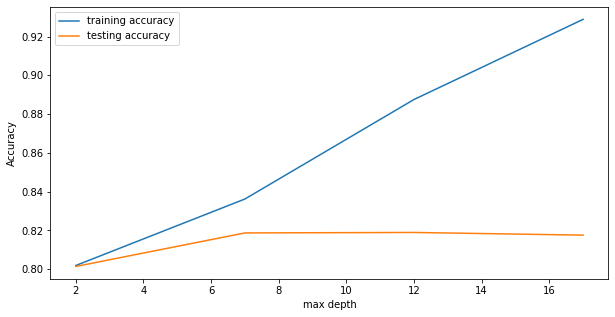

In [27]:
plt.figure(figsize=(10,5))
plt.plot(tree_cv_results['param_max_depth'],tree_cv_results['mean_train_score'],label="training accuracy")
plt.plot(tree_cv_results['param_max_depth'],tree_cv_results['mean_test_score'],label="testing accuracy")
plt.xlabel("max depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [34]:
params={'n_estimators':range(100,1500,400)}
rf=RandomForestClassifier(max_depth=4)
tree_cv=GridSearchCV(rf,params,return_train_score=True,verbose=2,n_jobs=-1,cv=folds,scoring="accuracy")
tree_cv.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:   17.1s remaining:   25.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   39.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=F

In [35]:
tree_results=pd.DataFrame(tree_cv.cv_results_)
tree_cv.best_params_

{'n_estimators': 100}

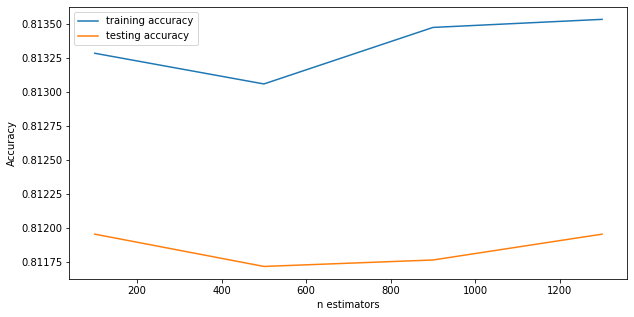

In [36]:
plt.figure(figsize=(10,5))
plt.plot(tree_results['param_n_estimators'],tree_results['mean_train_score'],label="training accuracy")
plt.plot(tree_results['param_n_estimators'],tree_results['mean_test_score'],label="testing accuracy")
plt.xlabel("n estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## hypertuning all the parameters using GridsearchCV

In [41]:
params_grid={'max_depth':[4,8,10],
'n_estimators':[100,200,300],
'max_features':[5,10],
'min_samples_leaf':range(100,400,200),
'min_samples_split':range(200,500,200),

}

In [42]:
rf=RandomForestClassifier()
grid_tune=GridSearchCV(rf,params_grid,verbose=1,return_train_score=True,n_jobs=-1,scoring='accuracy',cv=3)

In [43]:
grid_tune.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [44]:
grid_tune.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 300,
 'min_samples_split': 200,
 'n_estimators': 200}

In [45]:
final_model=rf=RandomForestClassifier(max_depth=10,max_features=10,min_samples_leaf=300,min_samples_split=200,n_estimators=200)

In [46]:
final_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=300, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
y_test_pred=final_model.predict(X_test)

In [48]:
print(classification_report(y_test,y_test_pred))

precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.68      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [49]:
sum(y)

6636

In [50]:
len(y)

30000

In [51]:
imbalance=sum(y)/len(y)

In [52]:
imbalance

0.2212

In [53]:
# conclusion with imabalance data RF gave the above results
# to improve this we have to apply SMOTE analysis to oversample the defaulter data 